<h2>Neural Network with PyTorch — Classifying Iris Flowers</h2>

In [ ]:
#Importing Required Libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Load & Preprocess the Data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# 1. Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y  
# Target is already encoded as 0, 1, 2

# 2. Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1],  # features
    df['species'],    # target
    test_size=0.2,
    random_state=42,
    stratify=df['species']
)

# 3. Normalize the feature values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display processed data shapes
print("Train feature shape:", X_train_scaled.shape)
print("Test feature shape:", X_test_scaled.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Train feature shape: (120, 4)
Test feature shape: (30, 4)
Train labels shape: (120,)
Test labels shape: (30,)


2. Visualize the Data

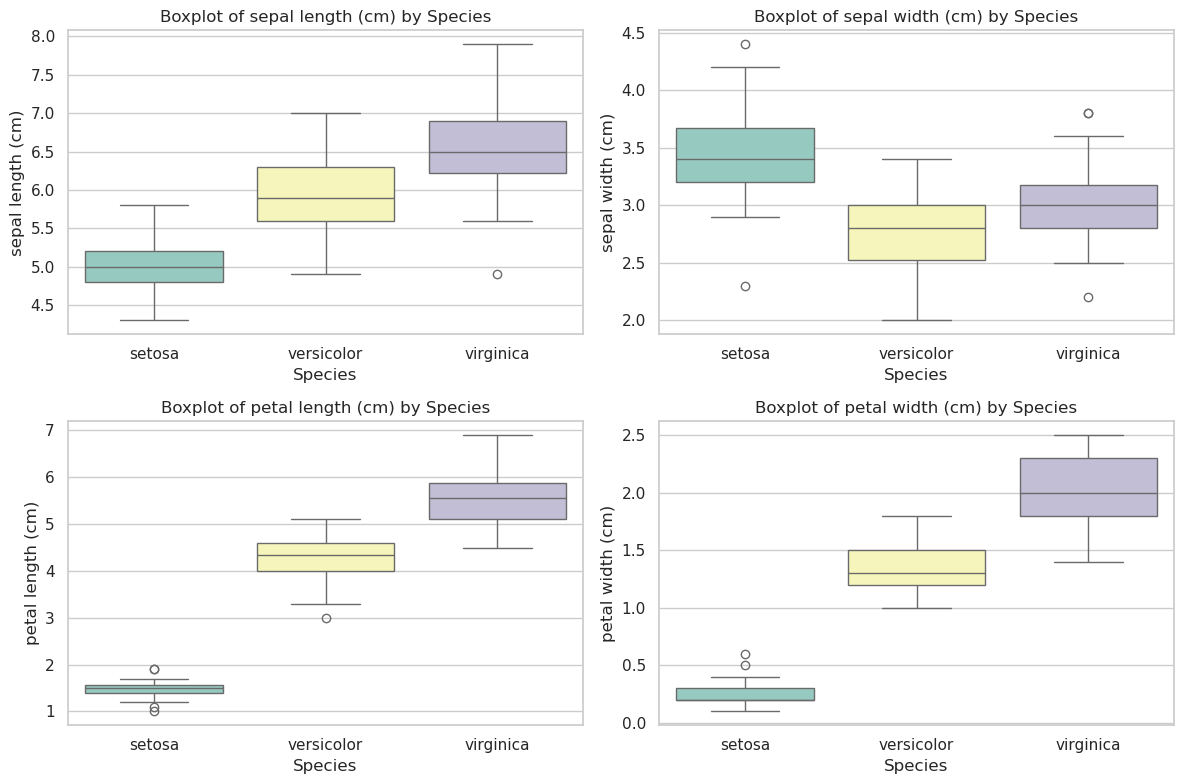

In [43]:
# Add species names back for visualization
df_viz = pd.DataFrame(X, columns=feature_names)
df_viz['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Create a figure with subplots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_viz, x='species', y=feature, hue='species', palette="Set3", legend=False)
    plt.title(f'Boxplot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()



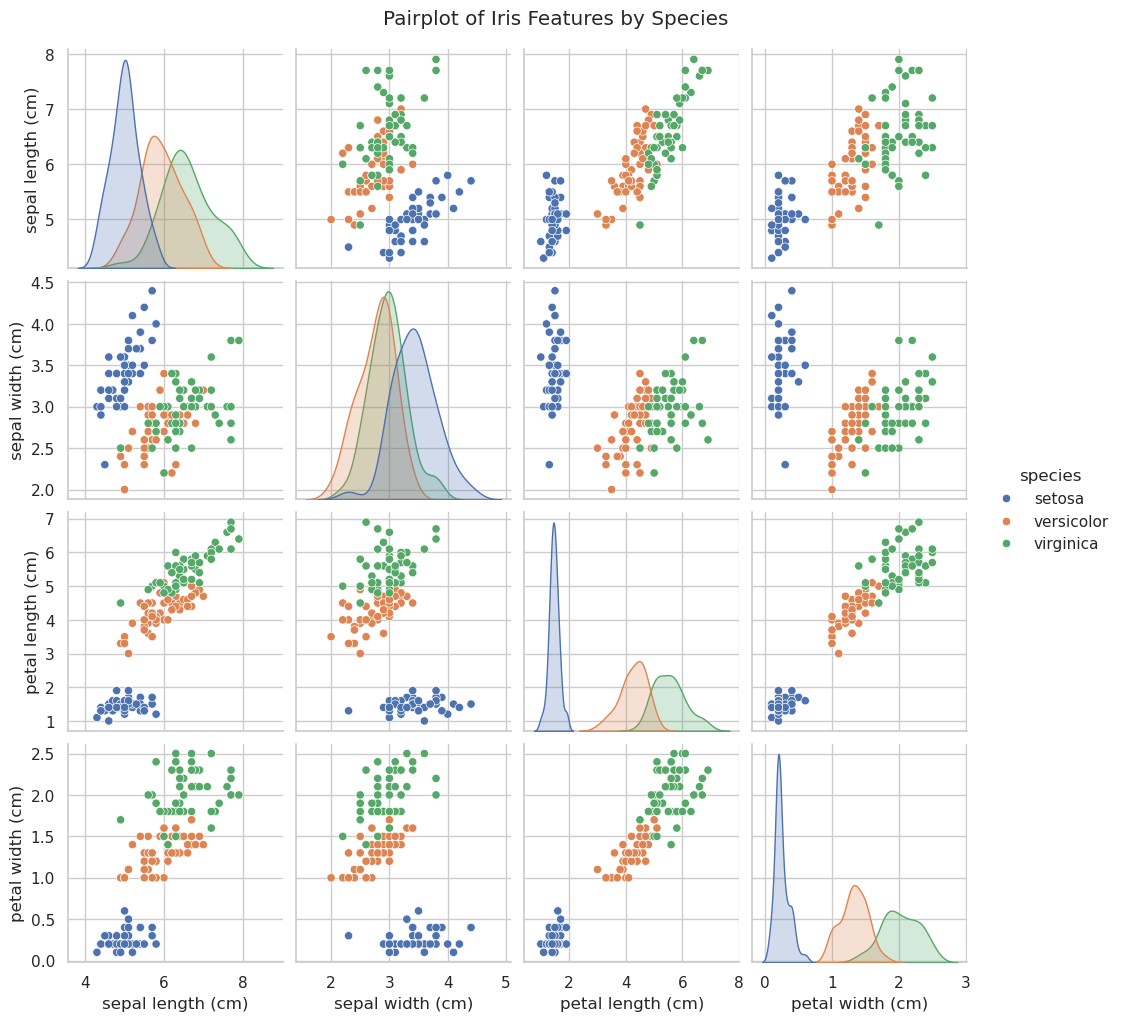

In [35]:
sns.pairplot(df_viz, hue='species')

plt.suptitle("Pairplot of Iris Features by Species", y=1.02)  # Slightly adjust title position
plt.show()


3. Build the Neural Network

In [36]:
import torch.nn as nn
import torch.optim as optim

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(4, 16),   # Input layer -> Hidden layer
    nn.ReLU(),
    nn.Linear(16, 3)    # Hidden layer -> Output layer
)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)


Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=3, bias=True)
)


4. Train the Model

In [37]:
from sklearn.metrics import accuracy_score

# Convert data to torch tensors (float for inputs, long for labels)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

epochs = 100

for epoch in range(1, epochs + 1):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            # Train loss and accuracy
            train_outputs = model(X_train_tensor)
            train_loss = criterion(train_outputs, y_train_tensor).item()
            _, train_preds = torch.max(train_outputs, 1)
            train_acc = accuracy_score(y_train_tensor, train_preds)
            
            # Test loss and accuracy
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor).item()
            _, test_preds = torch.max(test_outputs, 1)
            test_acc = accuracy_score(y_test_tensor, test_preds)
        
        print(f"Epoch [{epoch}/{epochs}] - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")


Epoch [10/100] - Train Loss: 1.1297, Train Acc: 0.5167 | Test Loss: 1.1307, Test Acc: 0.4333
Epoch [20/100] - Train Loss: 1.0582, Train Acc: 0.5333 | Test Loss: 1.0624, Test Acc: 0.5333
Epoch [30/100] - Train Loss: 0.9915, Train Acc: 0.5417 | Test Loss: 0.9982, Test Acc: 0.5000
Epoch [40/100] - Train Loss: 0.9290, Train Acc: 0.5667 | Test Loss: 0.9378, Test Acc: 0.6333
Epoch [50/100] - Train Loss: 0.8704, Train Acc: 0.7500 | Test Loss: 0.8811, Test Acc: 0.8000
Epoch [60/100] - Train Loss: 0.8155, Train Acc: 0.8917 | Test Loss: 0.8282, Test Acc: 0.8333
Epoch [70/100] - Train Loss: 0.7641, Train Acc: 0.9167 | Test Loss: 0.7788, Test Acc: 0.8333
Epoch [80/100] - Train Loss: 0.7162, Train Acc: 0.9083 | Test Loss: 0.7329, Test Acc: 0.8333
Epoch [90/100] - Train Loss: 0.6718, Train Acc: 0.9000 | Test Loss: 0.6904, Test Acc: 0.8333
Epoch [100/100] - Train Loss: 0.6311, Train Acc: 0.9000 | Test Loss: 0.6514, Test Acc: 0.8333


In [38]:
from sklearn.metrics import confusion_matrix

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(1, epochs + 1):
    model.train()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        # Train metrics
        train_outputs = model(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor).item()
        _, train_preds = torch.max(train_outputs, 1)
        train_acc = accuracy_score(y_train_tensor, train_preds)
        
        # Test metrics
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor).item()
        _, test_preds = torch.max(test_outputs, 1)
        test_acc = accuracy_score(y_test_tensor, test_preds)
        
    # Save metrics
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}] - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")


Epoch [10/100] - Train Loss: 0.5937, Train Acc: 0.8917 | Test Loss: 0.6160, Test Acc: 0.8333
Epoch [20/100] - Train Loss: 0.5595, Train Acc: 0.8917 | Test Loss: 0.5836, Test Acc: 0.8333
Epoch [30/100] - Train Loss: 0.5284, Train Acc: 0.8917 | Test Loss: 0.5542, Test Acc: 0.8333
Epoch [40/100] - Train Loss: 0.5000, Train Acc: 0.9000 | Test Loss: 0.5275, Test Acc: 0.8333
Epoch [50/100] - Train Loss: 0.4741, Train Acc: 0.9000 | Test Loss: 0.5032, Test Acc: 0.8333
Epoch [60/100] - Train Loss: 0.4503, Train Acc: 0.9000 | Test Loss: 0.4809, Test Acc: 0.8333
Epoch [70/100] - Train Loss: 0.4286, Train Acc: 0.9083 | Test Loss: 0.4606, Test Acc: 0.8333
Epoch [80/100] - Train Loss: 0.4086, Train Acc: 0.9167 | Test Loss: 0.4419, Test Acc: 0.8333
Epoch [90/100] - Train Loss: 0.3903, Train Acc: 0.9250 | Test Loss: 0.4247, Test Acc: 0.8667
Epoch [100/100] - Train Loss: 0.3734, Train Acc: 0.9250 | Test Loss: 0.4088, Test Acc: 0.8667


5. Creating the Plots

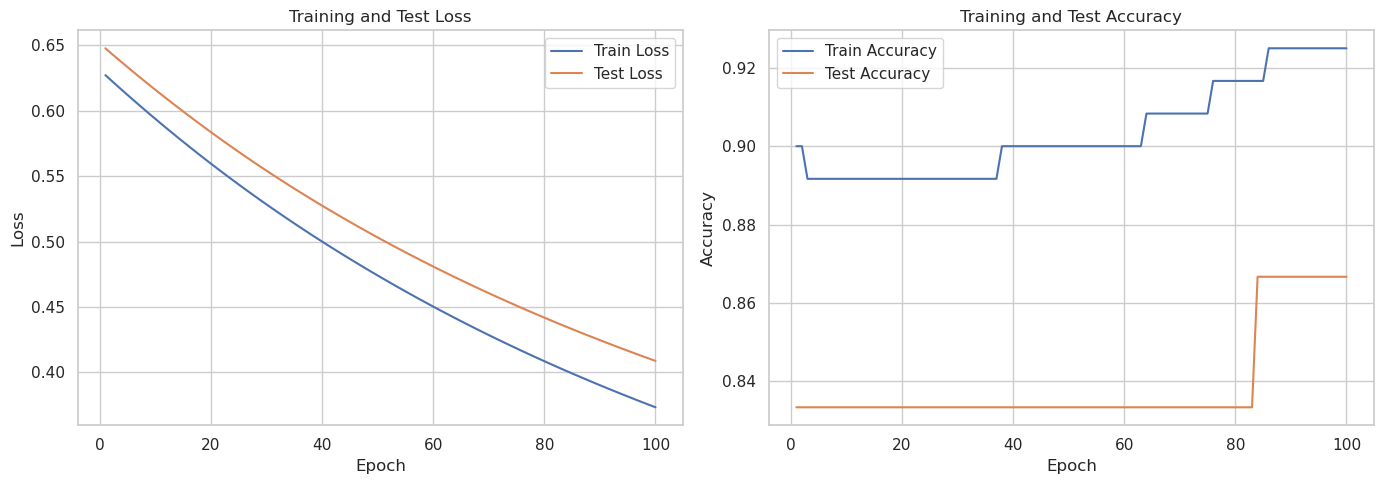

In [39]:
epochs_range = np.arange(1, epochs + 1)

plt.figure(figsize=(14, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


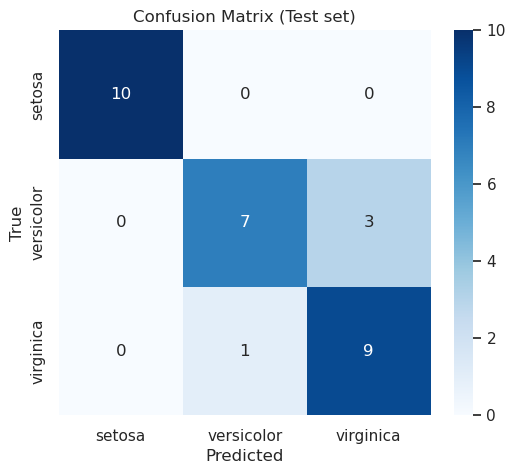

In [40]:
# Get final predictions on test set
model.eval()
with torch.no_grad():
    final_test_outputs = model(X_test_tensor)
    _, final_test_preds = torch.max(final_test_outputs, 1)

# Compute confusion matrix
cm = confusion_matrix(y_test_tensor, final_test_preds)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test set)')
plt.show()
